# Red Wine Quality Prediction Model

Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv


## Step 1: Importing the files

In [13]:
#Importing the files
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\shivangi s. dixit\anaconda3\lib\site-packages (0.24.2)




[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df=pd.read_csv('D:\Swapnil Dixit\Data Science\Data Trained\Internship -Fliprobo\Projects\First Phase Project\DSData-master\winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#Columns name
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
#Checking the value counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB





##### From the above Observation there is not null value in the column

quality (score between 0 and 10) What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

I will replave the 0-6 with not good / 0 and 7-10 with good / 1

In [9]:
df['quality']=df['quality'].replace(1,0)
df['quality']=df['quality'].replace(2,0)
df['quality']=df['quality'].replace(3,0)
df['quality']=df['quality'].replace(4,0)
df['quality']=df['quality'].replace(5,0)
df['quality']=df['quality'].replace(6,0)
df['quality']=df['quality'].replace(7,1)
df['quality']=df['quality'].replace(8,1)
df['quality']=df['quality'].replace(9,1)
df['quality']=df['quality'].replace(10,1)

In [10]:
#confirming the replacement
np.unique(df.quality)

array([0, 1], dtype=int64)

<AxesSubplot:>

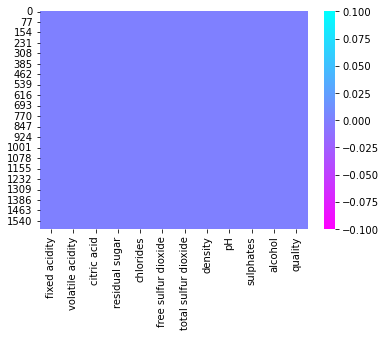

In [14]:
#Let's check the null value again
sns.heatmap(df.isnull(), cmap="cool_r")

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Observation from above describtion  
1. Summary of dataset in okay as there is no negative or invalid data is present  
2. The mean value of all the columns is greater than the median hence the data is right skewed  
3. By summarizing data we can see that there is a huge differnce between 75% and max hence outliers are present in the data  


## Step2: EDA

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

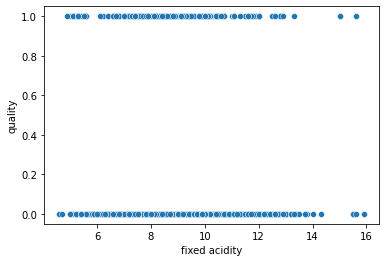

In [16]:
import seaborn as sns
sns.scatterplot(x="fixed acidity", y="quality", data=df)

We can see that fixed acidity and quality is equally distributed in the range 0 to 14

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

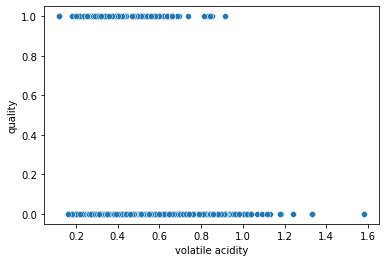

In [17]:
import seaborn as sns
sns.scatterplot(x="volatile acidity", y="quality", data=df)

We can see that Volatile acidity and quality is equally distributed in the range 0 to 11

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

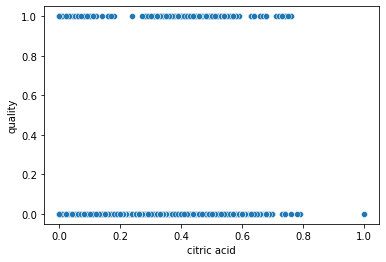

In [18]:
import seaborn as sns
sns.scatterplot(x="citric acid", y="quality", data=df)

We can see that Citric acid and quality is equally distributed in the range 0 to 0.8

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

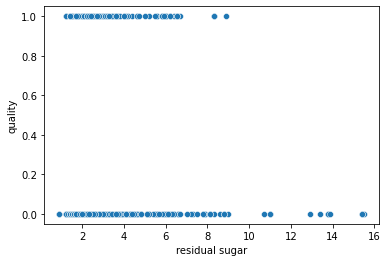

In [20]:
sns.scatterplot(x="residual sugar", y="quality", data=df)

We can see that Citric acid and quality is equally distributed in the range 0 to 6

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

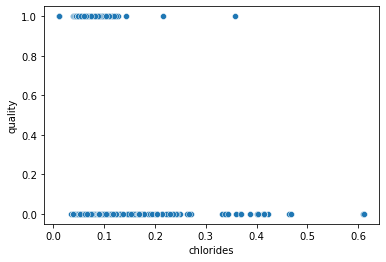

In [21]:
sns.scatterplot(x="chlorides", y="quality", data=df)

We can see that chlorides and quality is equally distributed in the range 0 to 0.5

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

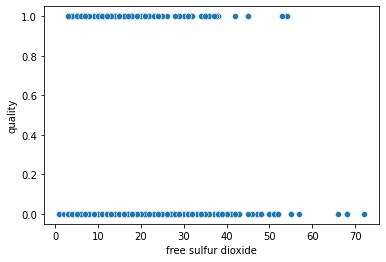

In [22]:
sns.scatterplot(x="free sulfur dioxide", y="quality", data=df)

We can see that free sulfur dioxide and quality is equally distributed in the range 0 to 55

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

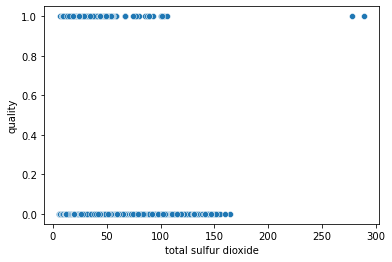

In [23]:
sns.scatterplot(x="total sulfur dioxide", y="quality", data=df)

We can see that total sulfur dioxide and quality is equally distributed in the range 0 to 155

<AxesSubplot:xlabel='density', ylabel='quality'>

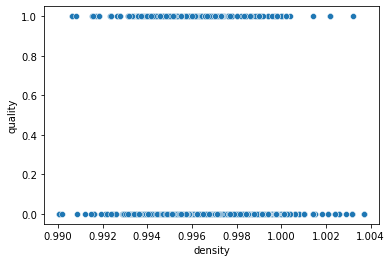

In [24]:
sns.scatterplot(x="density", y="quality", data=df)

We can see that density and quality is equally distributed in the range 0.990 to 1.004

<AxesSubplot:xlabel='pH', ylabel='quality'>

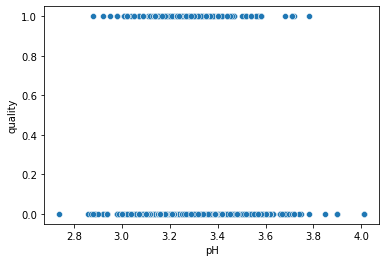

In [25]:
sns.scatterplot(x="pH", y="quality", data=df)

We can see that pH and quality is equally distributed in the range 2.8 to 3.8

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

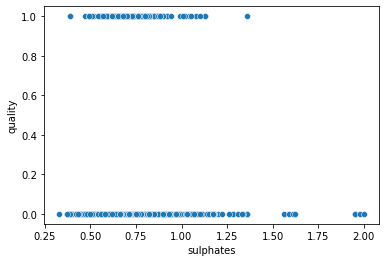

In [26]:
sns.scatterplot(x="sulphates", y="quality", data=df)

We can see that density and sulphates is equally distributed in the range 0.25 to 1.50

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

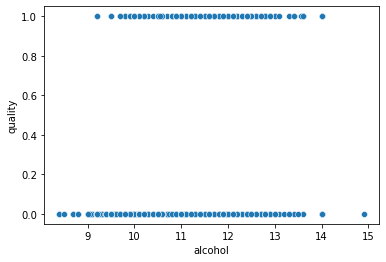

In [27]:
sns.scatterplot(x="alcohol", y="quality", data=df)

We can see that alcohol and quality is equally distributed in the range 9 to 14

In [28]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


<AxesSubplot:>

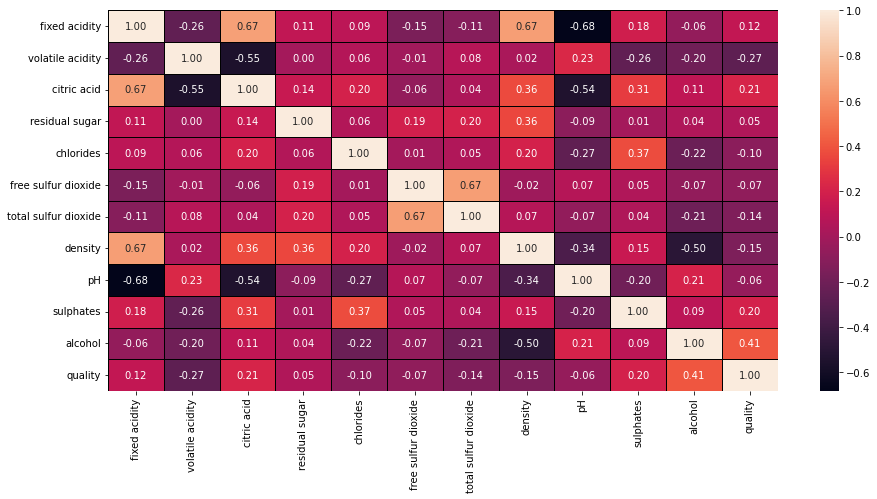

In [29]:
#coorelation using heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor="black",fmt='.2f')

Outcome of coorelation heatmap  
1. Columns fixed acidity, citric acid, residual sugar, sulphates and alcohol is positive co-related with quality  
2. columns volatile acidity, chlorides, free sulful dioxide, total sulfur dioxide, density and ph are negatively co-related with quality  
3. fixed acidity is 12% corelated to quality hece it is good bond of coorelation.  
4. citric acid is 21% corelated to quality hece it is good bond of coorelation.  
5. residual sugar is 5% corelated to quality hece it is weak bond of coorelation.  
6. sulphates is 20% corelated to quality hece it is good bond of coorelation.
7. alcohol is 12% corelated to quality hece it is strong bond of coorelation.  

Max Coorelation = alcohol  
Min Coorelation = volatile acidity

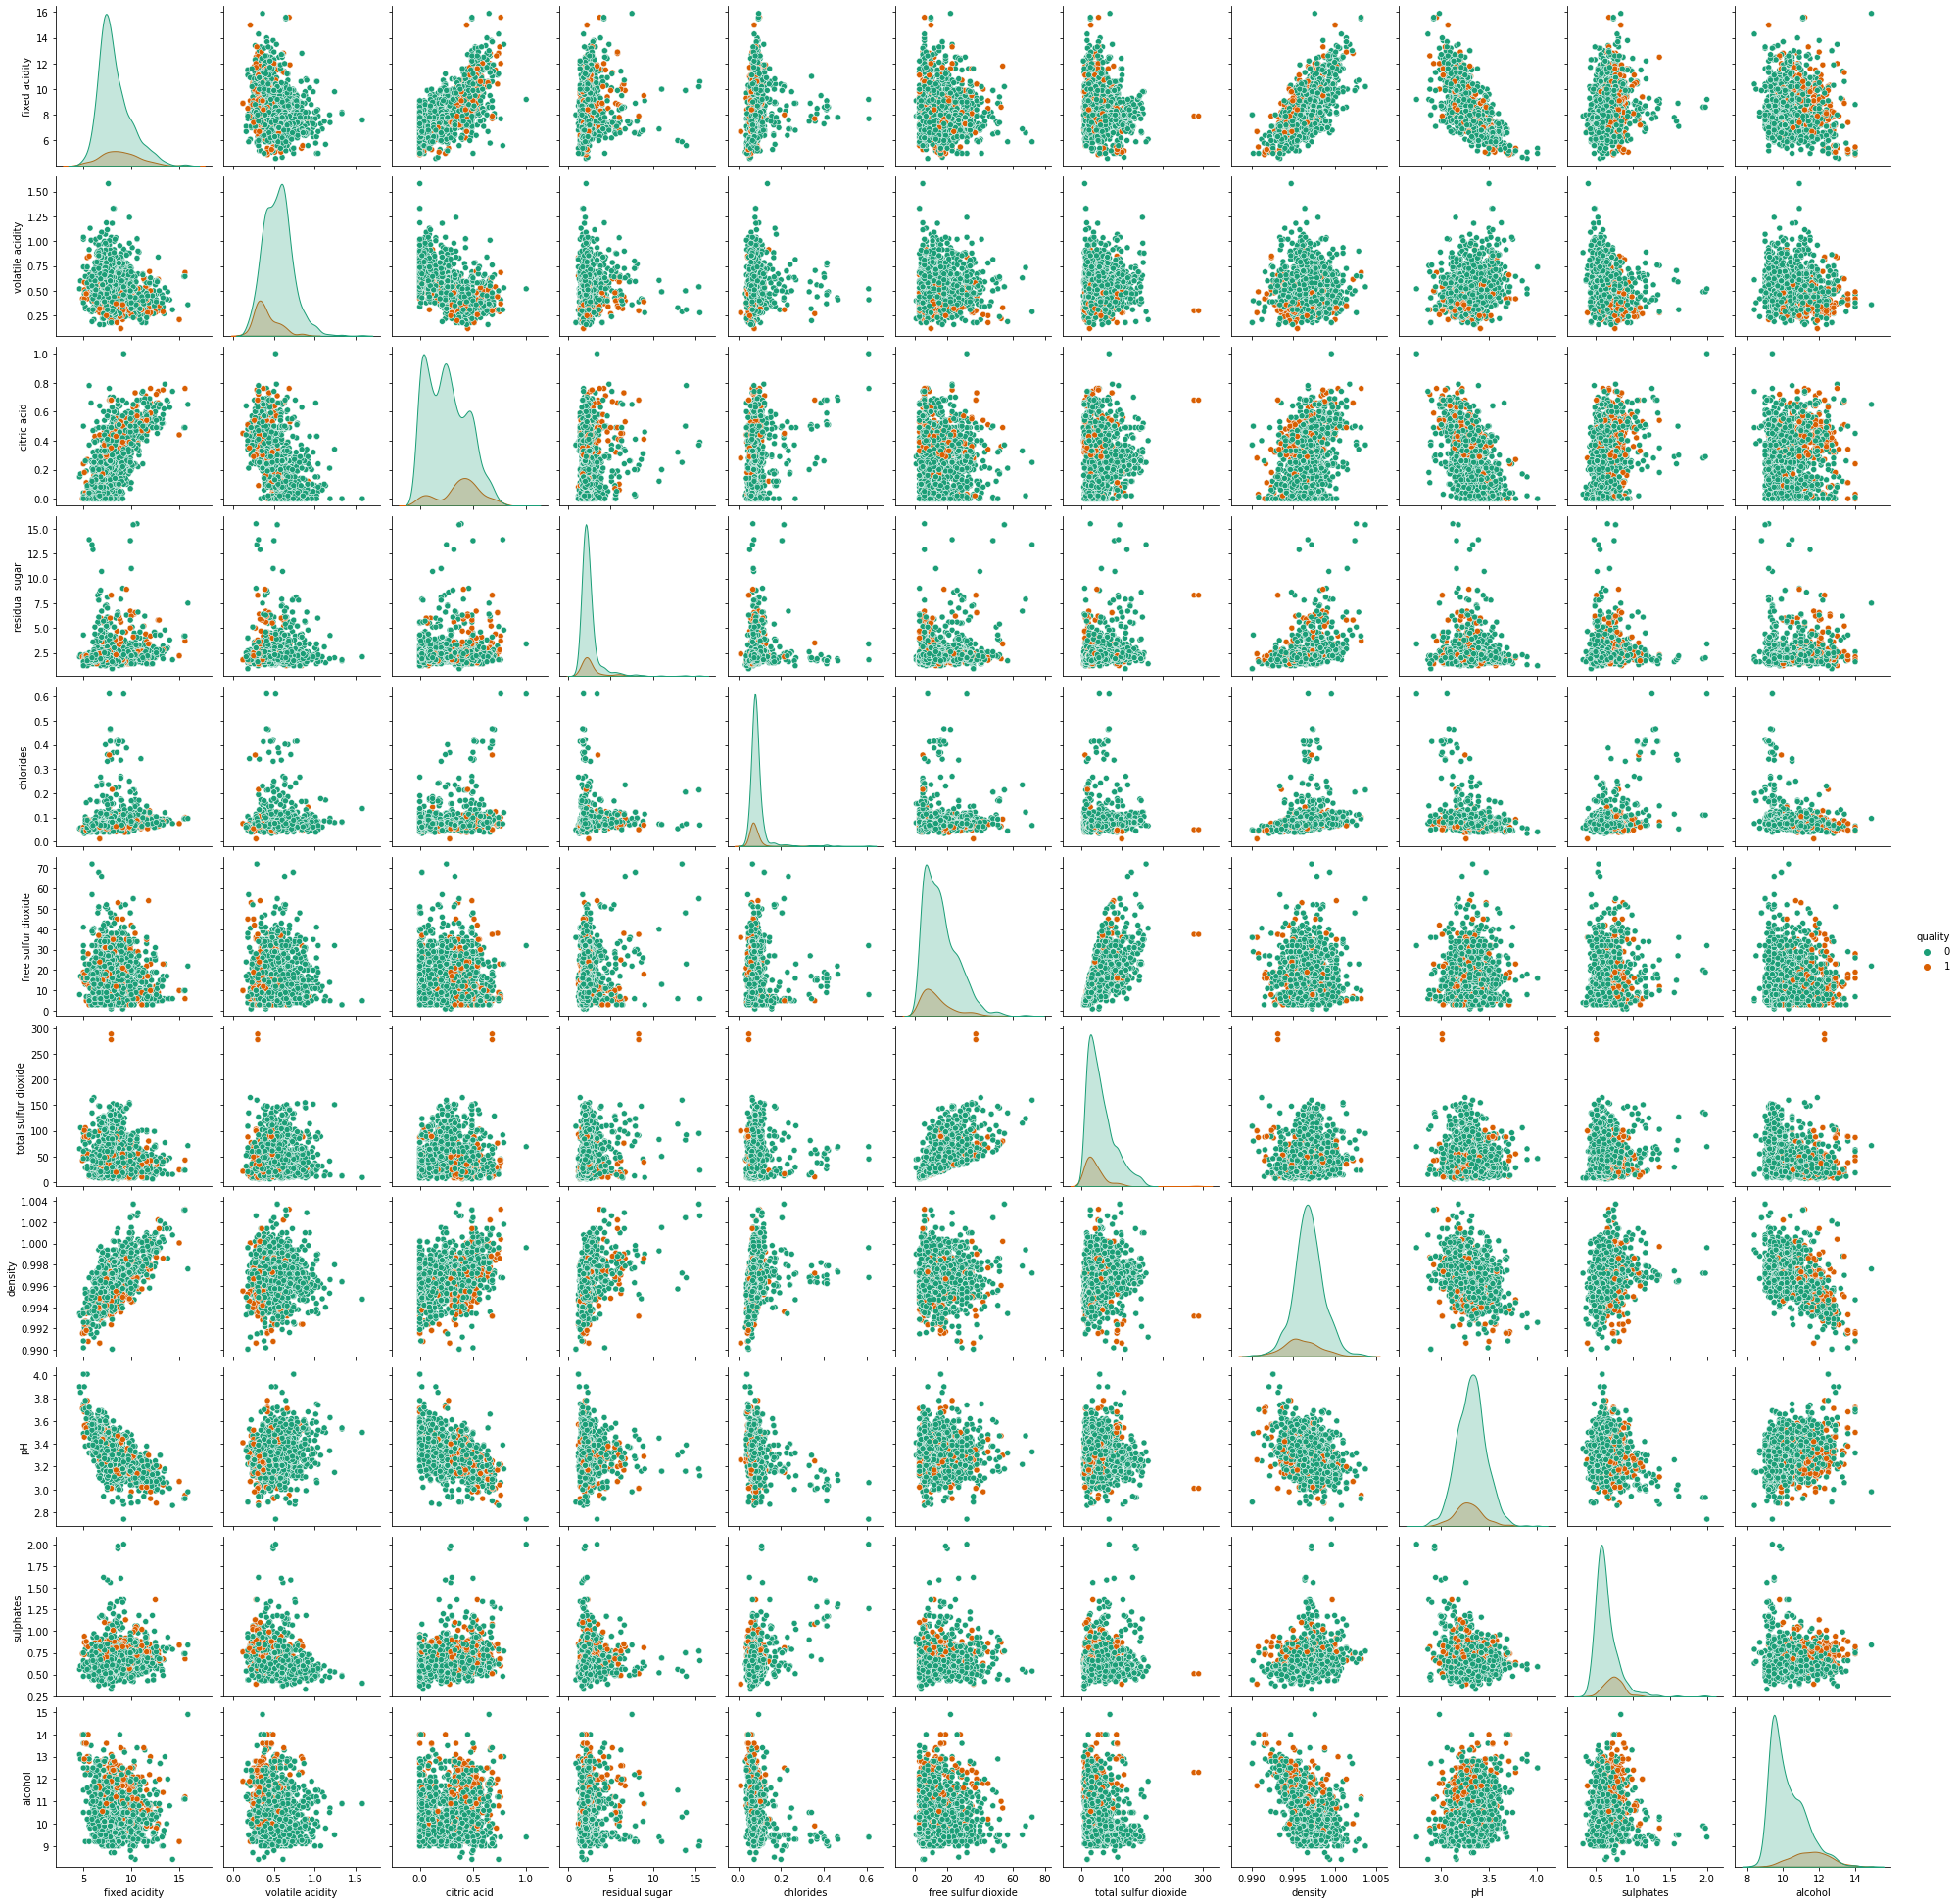

In [30]:
sns.pairplot(df, hue="quality", palette="Dark2")

The pair plot gives the relationship between the features on the basis of  target variable. On the diagonals we can notice the distribution plot.


### Checking for Outliers

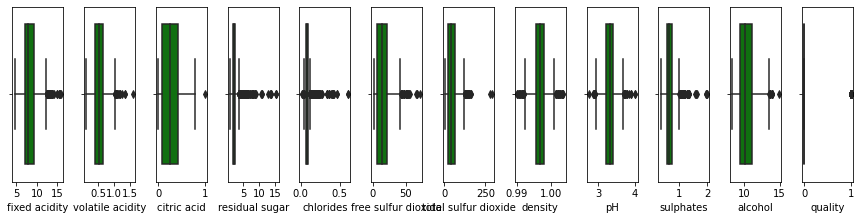

In [31]:
#let's check the outliers
collist=df.columns.values
ncol=20
nrows=20
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green", orient='v')
    plt.tight_layout()

From the above figure we can see that excep quality all the columns have outliers

### Skweness

In [32]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

### Normal Distribution Curve

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

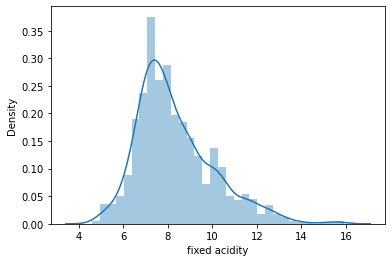

In [33]:
sns.distplot(df['fixed acidity'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

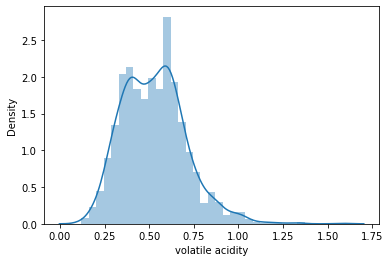

In [34]:
sns.distplot(df['volatile acidity'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

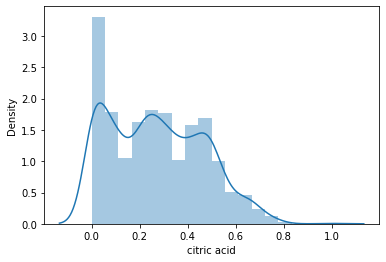

In [35]:
sns.distplot(df['citric acid'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

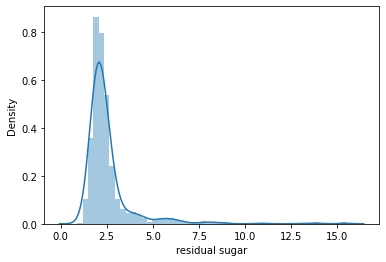

In [36]:
sns.distplot(df['residual sugar'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

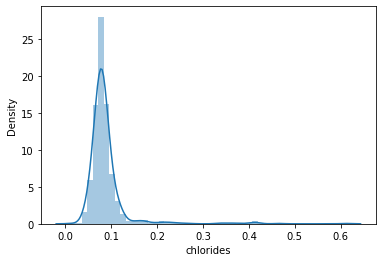

In [37]:
sns.distplot(df['chlorides'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

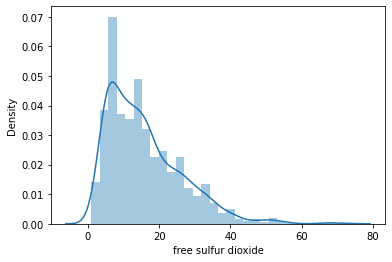

In [38]:
sns.distplot(df['free sulfur dioxide'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

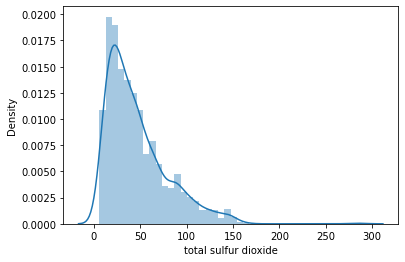

In [39]:
sns.distplot(df['total sulfur dioxide'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='density', ylabel='Density'>

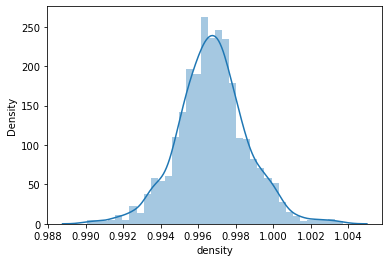

In [40]:
sns.distplot(df['density'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='pH', ylabel='Density'>

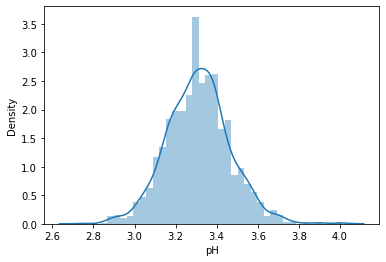

In [41]:
sns.distplot(df['pH'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

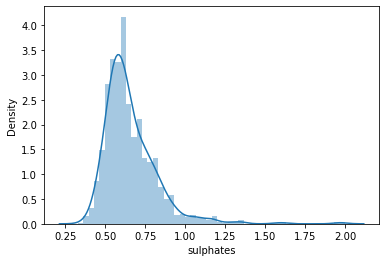

In [42]:
sns.distplot(df['sulphates'])

The data is not nomalised, The building blocks are out of the normalised curve.

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

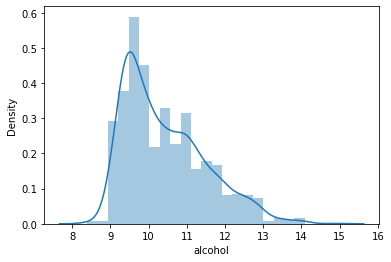

In [43]:
sns.distplot(df['alcohol'])

The data is not nomalised, The building blocks are out of the normalised curve.

The normal distribution curve outcome is irrelevant it shows the data is skewed.

### Data cleaning

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.396256
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.396256
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.396256
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.396256
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.396256
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.396256
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.396256
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.396256


In [45]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [46]:
df1=df[(z<3).all(axis=1)]

In [47]:
df1.shape

(1458, 12)

In [48]:
df.shape

(1599, 12)

In [49]:
#split the data into independent and dependent variable
df=df1

In [50]:
df.shape

(1458, 12)

In [51]:
x=df.drop('quality',axis=1)
y=df['quality']

In [52]:
x.shape

(1458, 11)

In [53]:
y.shape

(1458,)

In [54]:
#Now check the skewness

In [55]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [56]:
from sklearn.preprocessing import power_transform

In [57]:
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

In [58]:
x=df_new

### Finding the best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [60]:
#max_acc is max accuracy
#best_rs is best random state
max_acc=0
best_rs=0

if i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        best_rs=i
    print('The Best Accuracy score is:',max_acc,'With the Best Random State:',best_rs)


The Best Accuracy score is: 0.8949771689497716 With the Best Random State: 11


In [61]:
#Creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=11)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1020, 11)
(438, 11)
(1020,)
(438,)


### Applying Various Classification Models

In [63]:
#Creating instances
dr=DecisionTreeClassifier()
svm=SVC()
rf=RandomForestClassifier()

In [64]:
model=[lr,dr,svm,rf]

In [65]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8949771689497716
[[367  11]
 [ 35  25]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       378
           1       0.69      0.42      0.52        60

    accuracy                           0.89       438
   macro avg       0.80      0.69      0.73       438
weighted avg       0.88      0.89      0.88       438



accuracy score of DecisionTreeClassifier() is:
0.8767123287671232
[[344  34]
 [ 20  40]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       378
           1       0.54      0.67      0.60        60

    accuracy                           0.88       438
   macro avg       0.74      0.79      0.76       438
weighted avg       0.89      0.88      0.88       438



accuracy score of SVC() is:
0.8904109589041096
[[370   8]
 [ 40  20]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94

In [66]:
from sklearn.model_selection import cross_val_score
Lrs=cross_val_score(lr,x,y,cv=5)
print('Cross validation of LogisticRegression:',Lrs.mean())

Cross validation of LogisticRegression: 0.871745986913336


In [67]:
from sklearn.model_selection import cross_val_score
dtc=cross_val_score(dr,x,y,cv=5)
print('Cross Validation of DecisionTreeClassifier:',dtc.mean())

Cross Validation of DecisionTreeClassifier: 0.8277926846490609


In [68]:
from sklearn.model_selection import cross_val_score
rfc=cross_val_score(rf,x,y,cv=5)
print('Cross Validation of RandomForestClassifier:',rfc.mean())

Cross Validation of RandomForestClassifier: 0.8614484771454126


In [69]:
from sklearn.model_selection import cross_val_score
srs=cross_val_score(svm,x,y,cv=5)
print('Cross Validation of SVC:',srs.mean())

Cross Validation of SVC: 0.8655651273360636


Hyper Parameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid_param={'criterion':['gini','entropy']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'gini'}


In [72]:
gd_pred=gd.best_estimator_.predict(x_test)

In [73]:
gd_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [74]:
accuracy_score(y_test,gd_pred)

1.0

### AUC ROC Curve

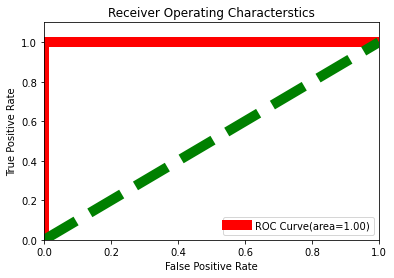

In [75]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(gd_pred, y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr, color='red', lw=10, label="ROC Curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="green",lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.10])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

### Saving the model

In [77]:
import joblib
joblib.dump(gd.best_estimator_,"Winetaste.pkl")

['Winetaste.pkl']